<a href="https://colab.research.google.com/github/navisihota/Machine-Learning/blob/main/K%20Mean/Country%20Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
country = pd.read_csv("https://github.com/navisihota/Dataset/blob/main/002%203.01.Country-clusters.csv?raw=True")

In [4]:
country.head()

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,English
1,Canada,62.40,-96.80,English
2,France,46.75,2.40,French
3,UK,54.01,-2.53,English
4,Germany,51.15,10.40,German


<Axes: xlabel='Longitude', ylabel='Latitude'>

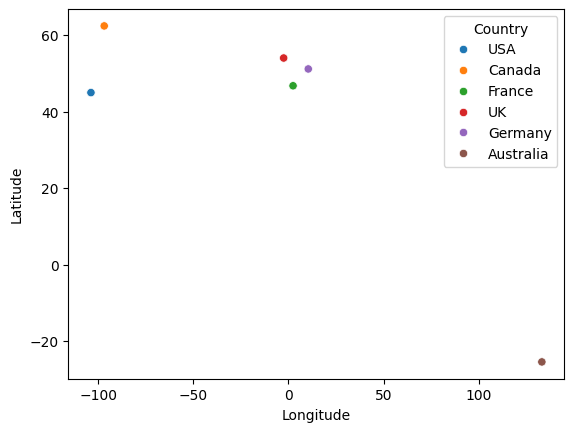

In [5]:
sns.scatterplot(data=country,x='Longitude',y='Latitude',hue='Country')

In [6]:
country['Language'] = country['Language'].map({'English':1,'French':2,'German':3})

In [7]:
x = country[['Language']]
x

,Language
0,1
1,1
2,2
3,1
4,3
5,1


In [8]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)

In [9]:
kmeans.fit(x)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [10]:
kmeans.predict(x)

array([0, 0, 2, 0, 1, 0], dtype=int32)

In [11]:
country['Clusters'] = kmeans.predict(x)

In [12]:
country.head()

,Country,Latitude,Longitude,Language,Clusters
0,USA,44.97,-103.77,1,0
1,Canada,62.40,-96.80,1,0
2,France,46.75,2.40,2,2
3,UK,54.01,-2.53,1,0
4,Germany,51.15,10.40,3,1


<Axes: xlabel='Longitude', ylabel='Latitude'>

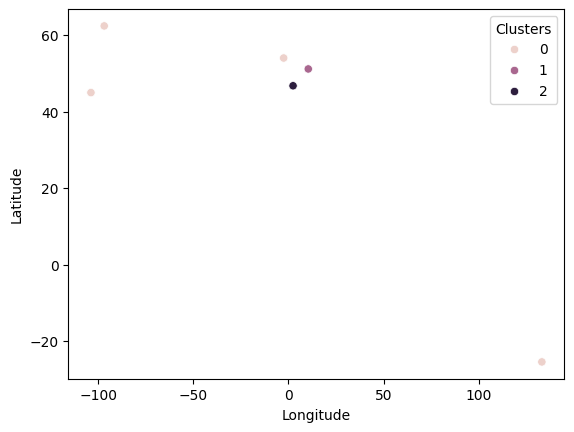

In [13]:
sns.scatterplot(data=country,x='Longitude',y='Latitude',hue='Clusters')

In [14]:
kmeans.fit(country[['Language']])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [15]:
kmeans.predict(country[['Language']])

array([0, 0, 2, 0, 1, 0], dtype=int32)

In [16]:
country['Language'] = kmeans.predict(country[['Language']])

In [17]:
country

,Country,Latitude,Longitude,Language,Clusters
0,USA,44.97,-103.77,0,0
1,Canada,62.40,-96.80,0,0
2,France,46.75,2.40,2,2
3,UK,54.01,-2.53,0,0
4,Germany,51.15,10.40,1,1
5,Australia,-25.45,133.11,0,0


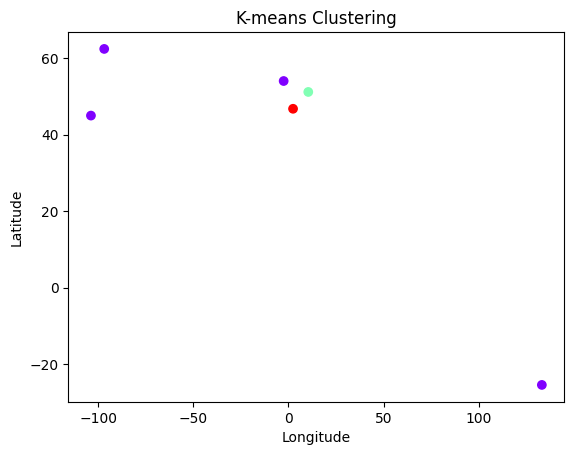

In [18]:
plt.scatter(country['Longitude'],country['Latitude'],c=country['Language'],cmap='rainbow')
plt.title('K-means Clustering')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()